In [1]:
from  heron import  regression
from heron import data
from heron import kernels
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_file = np.genfromtxt('/home/daniel/repositories/heron/data/SN_d_tot_V2.0.csv', delimiter=';')

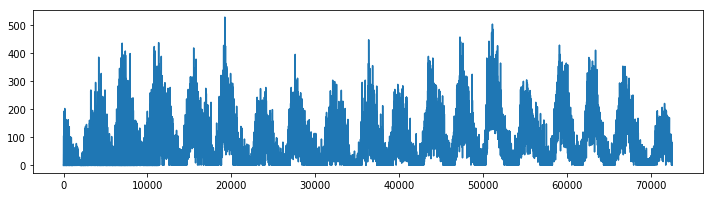

In [3]:
f, ax = plt.subplots(1,1, figsize=(12,3))
NULLS = data_file[:,4]==-1
x = np.arange(len(data_file[:,4]), dtype=np.float32)
plt.plot(x, data_file[:,4])

In [16]:
a = np.delete(x, NULLS, axis=0)
t = np.delete(data_file[:,4], NULLS, axis=0)
sun = data.Data(a[::100], t[::100],             
                    target_names = ["Day Number"],
                    label_names = ["Sunspot Count"],
                    test_size = 0.2,
                    )

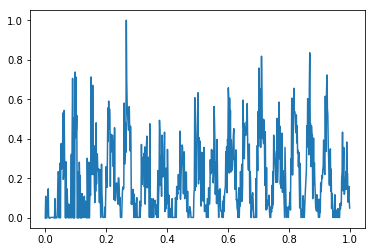

In [17]:
plt.plot(sun.targets.T, sun.labels.T)

In [27]:
x0 = [(1/np.std(sun.labels))**2, 1]
gp = regression.Regressor(sun, kernel=kernels.SquaredExponential(ndim=1), tikh=1e-3)
gp.set_hyperparameters(x0)

(1, 726) (1, 726)


ValueError: array must not contain infs or NaNs

In [20]:
new_point = np.linspace(0, 1000, 100)
#new_point = np.atleast_2d(new_point)
pred = gp.prediction(new_point)

(1, 726) (1, 100)


ValueError: XA and XB must have the same number of columns (i.e. feature dimension.)